In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def creat_data(mm):
    file_path = './Data/서울특별시 공공자전거 이용정보(시간대별)_2021년/서울특별시 공공자전거 이용정보(시간대별)_21.{}.csv'.format(mm)
    f = pd.read_csv(file_path)
    
    f_df = f[['대여일자', '대여시간', '대여소번호', '이용건수']]
    return(f_df)  

In [3]:
df = pd.DataFrame()

for mm in tqdm(range(1, 13)):

    try:
        mm_str = str(mm).zfill(2)
        temp = creat_data(mm_str)
        df = df.append(temp, ignore_index=True)

    except:
        print('err'+mm_str)
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:45<00:00,  3.75s/it]


In [4]:
df = df.astype({'이용건수':'int64'})

In [5]:
df

,대여일자,대여시간,대여소번호,이용건수
0,2021-01-01,0,1347,2
1,2021-01-01,0,1349,1
2,2021-01-01,0,1168,1
3,2021-01-01,0,2619,1
4,2021-01-01,0,536,1
...,...,...,...,...
25421808,2021-12-31,23,4561,1
25421809,2021-12-31,23,815,1
25421810,2021-12-31,23,2173,1
25421811,2021-12-31,23,2718,1


# 따릉이_월별 전처리

In [14]:
a = []
for i in tqdm(range(0, 25421813)):
    a.append(df.loc[i, '대여일자'][:7])

100%|███████████████████████████████████████████████████████████████████| 25421813/25421813 [06:26<00:00, 65793.28it/s]


In [28]:
a_1 = a.copy()

In [34]:
a_2 = np.array(a_1)

In [35]:
a_3 = a_2.reshape(-1, 1)

In [37]:
df['월'] = a_3

In [38]:
df

,대여일자,대여시간,대여소번호,이용건수,월
0,2021-01-01,0,1347,2,2021-01
1,2021-01-01,0,1349,1,2021-01
2,2021-01-01,0,1168,1,2021-01
3,2021-01-01,0,2619,1,2021-01
4,2021-01-01,0,536,1,2021-01
...,...,...,...,...,...
25421808,2021-12-31,23,4561,1,2021-12
25421809,2021-12-31,23,815,1,2021-12
25421810,2021-12-31,23,2173,1,2021-12
25421811,2021-12-31,23,2718,1,2021-12


# 하나씩 저장해보자!!

In [39]:
df_co = df.copy()

In [40]:
df_01 = df_co[['월', '이용건수']]
df_01

,월,이용건수
0,2021-01,2
1,2021-01,1
2,2021-01,1
3,2021-01,1
4,2021-01,1
...,...,...
25421808,2021-12,1
25421809,2021-12,1
25421810,2021-12,1
25421811,2021-12,1


In [46]:
df_gr = df_01.groupby('월')['이용건수'].sum()
df_gr_01 = pd.DataFrame(df_gr).reset_index()
df_gr_01

,월,이용건수
0,2021-01,782805
1,2021-02,1213352
2,2021-03,2010695
3,2021-04,2959927
4,2021-05,2588798
5,2021-06,2969230
6,2021-07,2824655
7,2021-08,2784969
8,2021-09,3374118
9,2021-10,3030334


In [47]:
df_gr_01.to_excel('./Data/서울따릉이월별이용건수.xlsx')

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

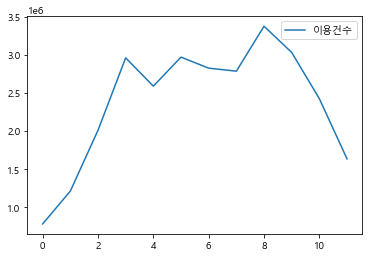

In [49]:
plt.figure(figsize = (12,8))
df_gr_01.plot()
plt.legend()
plt.show

In [51]:
df_02 = df_co[['월','대여시간', '이용건수']]
df_02

,월,대여시간,이용건수
0,2021-01,0,2
1,2021-01,0,1
2,2021-01,0,1
3,2021-01,0,1
4,2021-01,0,1
...,...,...,...
25421808,2021-12,23,1
25421809,2021-12,23,1
25421810,2021-12,23,1
25421811,2021-12,23,1


In [53]:
df_gr2 = df_02.groupby(['월','대여시간'])['이용건수'].sum()
df_gr_02 = pd.DataFrame(df_gr2).reset_index()
df_gr_02

,월,대여시간,이용건수
0,2021-01,0,11906
1,2021-01,1,9495
2,2021-01,2,6553
3,2021-01,3,4741
4,2021-01,4,4072
...,...,...,...
283,2021-12,19,99674
284,2021-12,20,77325
285,2021-12,21,75681
286,2021-12,22,58754


In [54]:
df_gr_02.to_excel('./Data/서울따릉이월별시간별이용건수.xlsx')

In [55]:
df_03 = df_co[['월', '대여소번호', '이용건수']]
df_03

,월,대여소번호,이용건수
0,2021-01,1347,2
1,2021-01,1349,1
2,2021-01,1168,1
3,2021-01,2619,1
4,2021-01,536,1
...,...,...,...
25421808,2021-12,4561,1
25421809,2021-12,815,1
25421810,2021-12,2173,1
25421811,2021-12,2718,1


In [56]:
df_gr3 = df_03.groupby(['월','대여소번호'])['이용건수'].sum()
df_gr_03 = pd.DataFrame(df_gr3).reset_index()
df_gr_03

,월,대여소번호,이용건수
0,2021-01,3,14
1,2021-01,5,7
2,2021-01,10,54
3,2021-01,101,347
4,2021-01,102,1065
...,...,...,...
29080,2021-12,9992,10
29081,2021-12,9993,2
29082,2021-12,9997,18
29083,2021-12,9999,77


In [57]:
df_gr_03.to_excel('./Data/서울따릉이월별대여소별이용건수.xlsx')

In [58]:
df_04 = df_co[['대여일자', '이용건수']]
df_04

,대여일자,이용건수
0,2021-01-01,2
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,1
4,2021-01-01,1
...,...,...
25421808,2021-12-31,1
25421809,2021-12-31,1
25421810,2021-12-31,1
25421811,2021-12-31,1


In [59]:
import datetime
# str_datetime = '2021-07-18 12:15:33'
# format = '%Y-%m-%d %H:%M:%S'
# dt_datetime = datetime.datetime.strptime(datetime_str,format)

In [73]:
ww = df_04['대여일자'][0]
datetime.datetime.strptime(ww,'%Y-%m-%d')

datetime.datetime(2021, 1, 1, 0, 0)

In [74]:
a2 = []
for i in tqdm(range(0, 25421813)):
    date = df.loc[i, '대여일자']
    date1 = datetime.datetime.strptime(date,'%Y-%m-%d')
    dateDict = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}
    day =  dateDict[date1.weekday()]
    a2.append(day)

100%|███████████████████████████████████████████████████████████████████| 25421813/25421813 [13:11<00:00, 32137.16it/s]


In [75]:
a2_1 = np.array(a2).reshape(-1,1)
df_co['요일'] = a2_1
df_co

,대여일자,대여시간,대여소번호,이용건수,월,요일
0,2021-01-01,0,1347,2,2021-01,금요일
1,2021-01-01,0,1349,1,2021-01,금요일
2,2021-01-01,0,1168,1,2021-01,금요일
3,2021-01-01,0,2619,1,2021-01,금요일
4,2021-01-01,0,536,1,2021-01,금요일
...,...,...,...,...,...,...
25421808,2021-12-31,23,4561,1,2021-12,금요일
25421809,2021-12-31,23,815,1,2021-12,금요일
25421810,2021-12-31,23,2173,1,2021-12,금요일
25421811,2021-12-31,23,2718,1,2021-12,금요일


In [76]:
df_04 = df_co[['월', '요일', '이용건수']]
df_04

,월,요일,이용건수
0,2021-01,금요일,2
1,2021-01,금요일,1
2,2021-01,금요일,1
3,2021-01,금요일,1
4,2021-01,금요일,1
...,...,...,...
25421808,2021-12,금요일,1
25421809,2021-12,금요일,1
25421810,2021-12,금요일,1
25421811,2021-12,금요일,1


In [77]:
df_gr4 = df_04.groupby(['월','요일'])['이용건수'].sum()
df_gr_04 = pd.DataFrame(df_gr4).reset_index()
df_gr_04

,월,요일,이용건수
0,2021-01,금요일,120409
1,2021-01,목요일,60099
2,2021-01,수요일,122947
3,2021-01,월요일,123468
4,2021-01,일요일,137056
...,...,...,...
79,2021-12,수요일,311316
80,2021-12,월요일,225731
81,2021-12,일요일,124858
82,2021-12,토요일,153331


In [78]:
df_gr_04.to_excel('./Data/서울따릉이월별요일별이용건수.xlsx')

In [79]:
df_05 = df_co[['요일', '이용건수']]
df_05

,요일,이용건수
0,금요일,2
1,금요일,1
2,금요일,1
3,금요일,1
4,금요일,1
...,...,...
25421808,금요일,1
25421809,금요일,1
25421810,금요일,1
25421811,금요일,1


In [80]:
df_gr5 = df_05.groupby(['요일'])['이용건수'].sum()
df_gr_05 = pd.DataFrame(df_gr5).reset_index()
df_gr_05

,요일,이용건수
0,금요일,4430468
1,목요일,4446008
2,수요일,4615747
3,월요일,3999517
4,일요일,3573191
5,토요일,3667751
6,화요일,3865846


In [81]:
df_gr_05.to_excel('./Data/서울따릉이요일별이용건수.xlsx')